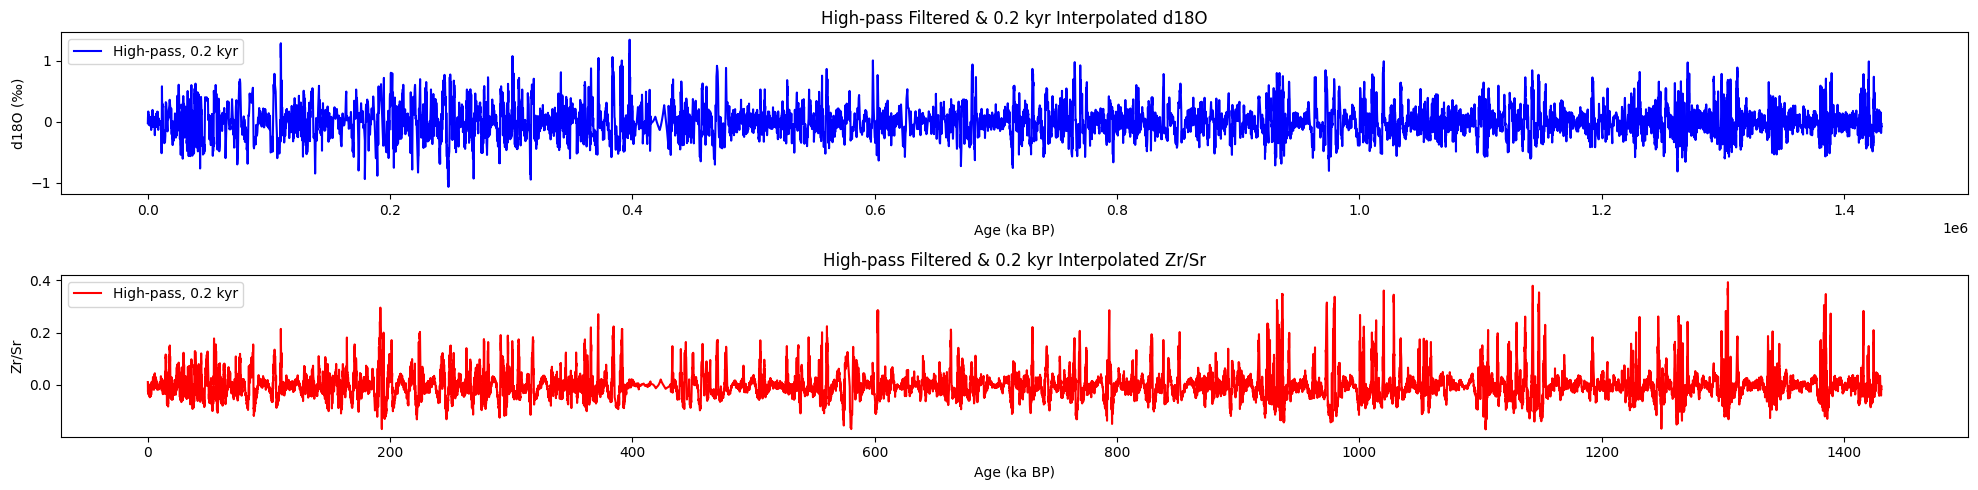

Are there any NaN values in the interpolated d18O data? False
Are there any NaN values in the interpolated ZrSr data? False


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# read the csv data
# df_d18O_0_2 = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\David_data\MD01-2444_339-U1385_benthic_d18O_hp.csv')
df_d18O_0_2 = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\David_data\MD01-2444_339-U1385_plank_d18O_hp.csv')
df_ZrSr_0_2 = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\David_data\339-U1385_CaTi_ZrSr_hp.csv')

df_d18O_0_2['age']=df_d18O_0_2['age']*1000

# 5) Plot filtered & downsampled series
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(df_d18O_0_2['age'], df_d18O_0_2['d18O_hp'], color='blue', label='High-pass, 0.2 kyr')
plt.xlabel('Age (ka BP)')
plt.ylabel('d18O (‰)')
plt.title('High-pass Filtered & 0.2 kyr Interpolated d18O')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_ZrSr_0_2['age'], df_ZrSr_0_2['ZrSr_hp'], color='red', label='High-pass, 0.2 kyr')
plt.xlabel('Age (ka BP)')
plt.ylabel('Zr/Sr')
plt.title('High-pass Filtered & 0.2 kyr Interpolated Zr/Sr')
plt.legend()

plt.tight_layout()
plt.show()


df_filt_d18O =df_d18O_0_2.copy()
# rename columns
df_filt_d18O.rename(columns={'d18O_hp': 'filt_d18O'}, inplace=True)

# crop the age<=640,000
# df_filt_d18O = df_filt_d18O[df_filt_d18O['age'] <= 640000]

df_filt_d18O = df_filt_d18O[df_filt_d18O['age'] <= 640_000]

# save the filtered d18O data to csv under /filtered_data
# df_filt_d18O.to_csv(r'D:\VScode\bipolar_seesaw_CCM\filtered_data\MD01-2444_339-U1385_benthic_d18O_hp_filt.csv', index=False)
df_filt_d18O.to_csv(r'D:\VScode\bipolar_seesaw_CCM\filtered_data\MD01-2444_339-U1385_plank_d18O_hp_filt.csv', index=False)

df_filt_d18O['filt_d18O'] = df_filt_d18O['filt_d18O'].rolling(window=5, min_periods=1).mean()
# drop NaN values
df_filt_d18O = df_filt_d18O.dropna()

print("Are there any NaN values in the interpolated d18O data?", df_d18O_0_2.isnull().values.any())
print("Are there any NaN values in the interpolated ZrSr data?", df_ZrSr_0_2.isnull().values.any())

In [16]:
df_d18O_0_2

,age,d18O_hp
0,140.0,0.040605
1,340.0,-0.058253
2,540.0,-0.064243
3,740.0,-0.115954
4,940.0,-0.081975
...,...,...
7150,1430140.0,0.116127
7151,1430340.0,0.172513
7152,1430540.0,0.188304
7153,1430740.0,0.169507


     dt     te_xy  p_xy     te_yx  p_yx  sig_uni
0    10  0.000379  0.00  0.000146  0.48     True
1    20  0.000796  0.00  0.000291  0.42     True
2    30  0.001215  0.00  0.000341  0.73     True
3    40  0.001589  0.00  0.000471  0.75     True
4    50  0.001977  0.00  0.000516  0.76     True
5    60  0.002351  0.00  0.000992  0.37     True
6    70  0.003026  0.00  0.000817  0.63     True
7    80  0.003458  0.00  0.001010  0.44     True
8    90  0.003528  0.00  0.000874  0.72     True
9   100  0.004200  0.00  0.000720  0.85     True
10  200  0.005702  0.03  0.002756  0.46     True


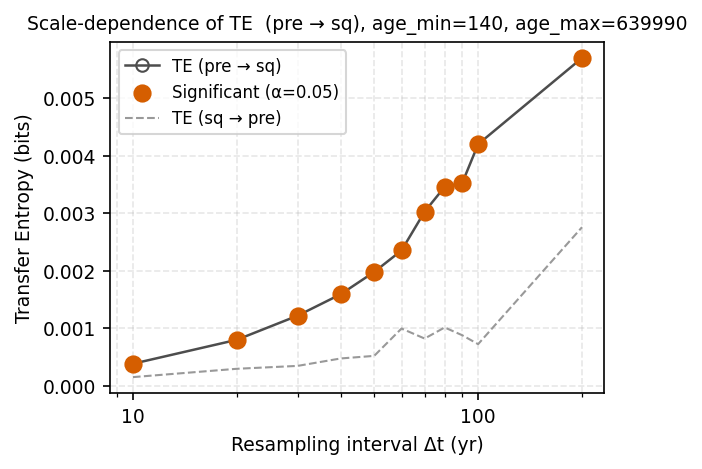

In [22]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing_bins=6, sq_bins=2,
    k=1,
    n_surr=100, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy  p_xy     te_yx  p_yx  sig_uni
0    10  0.000473  0.77  0.000129  0.75    False
1    20  0.001118  0.76  0.000308  0.59    False
2    30  0.001875  0.64  0.000461  0.46    False
3    40  0.002724  0.59  0.000506  0.62    False
4    50  0.004276  0.39  0.000906  0.42    False
5    60  0.005183  0.75  0.000927  0.54    False
6    70  0.007737  0.25  0.000980  0.63    False
7    80  0.009898  0.18  0.001077  0.59    False
8    90  0.008645  0.85  0.001313  0.57    False
9   100  0.011915  0.52  0.002299  0.13    False
10  200  0.023477  0.66  0.002911  0.56    False


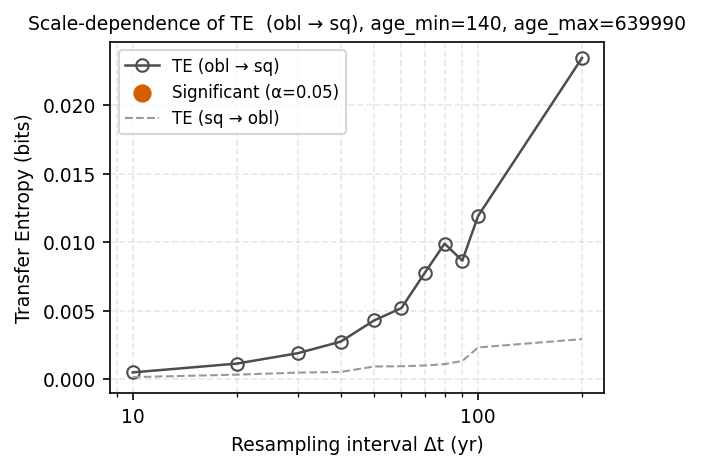

In [23]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=7, sq_bins=2,
    k=4,
    n_surr=100, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)

# TE from pre and obl to Plankic d18O MCV

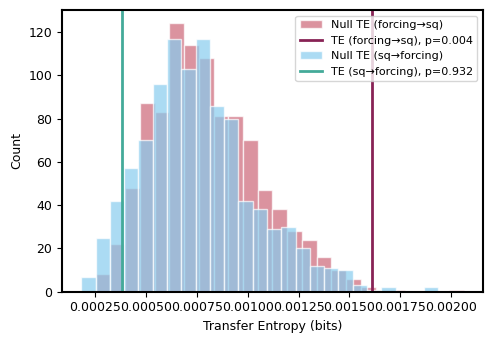

True


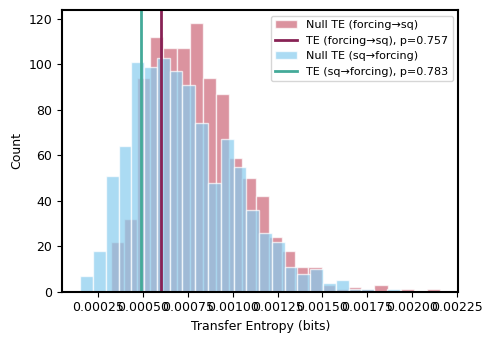

False


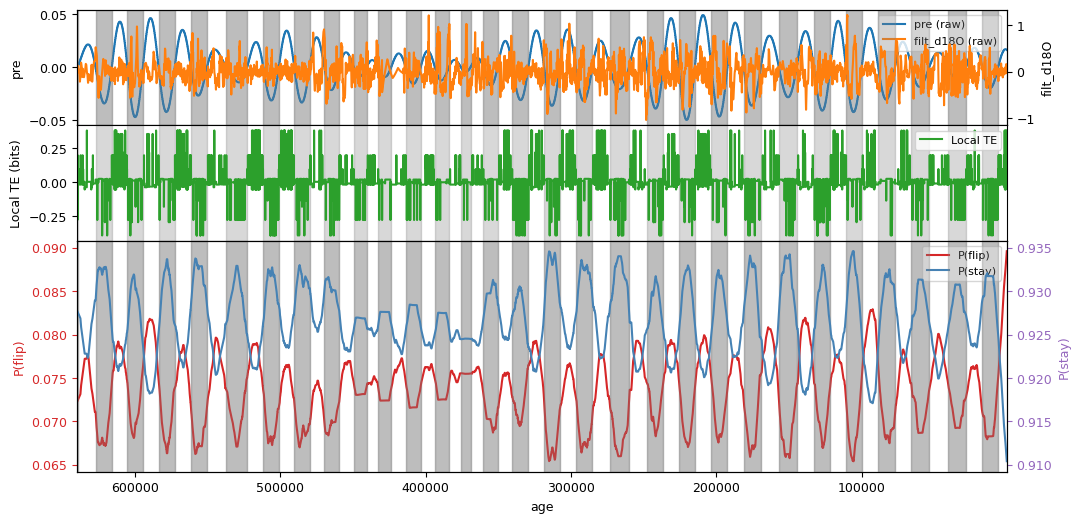

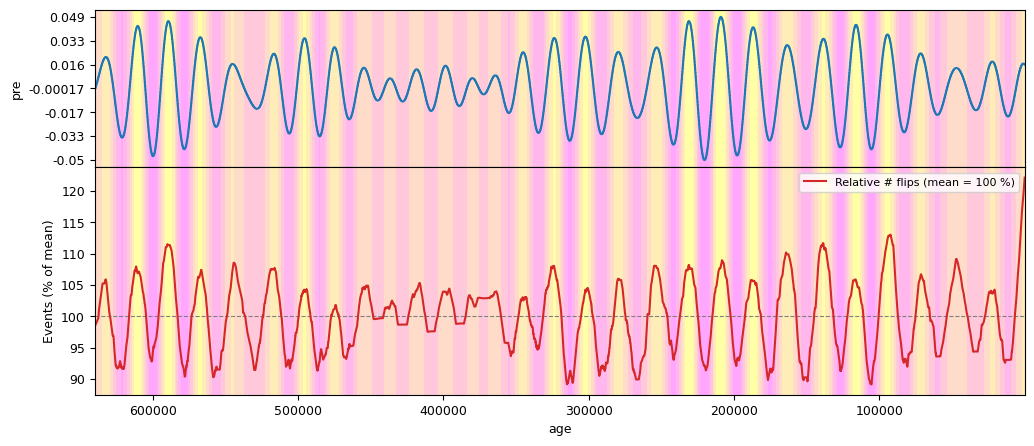

[ 98.33791865  98.36491485  98.39191105 ... 121.79923814 121.96302353
 122.12680891]


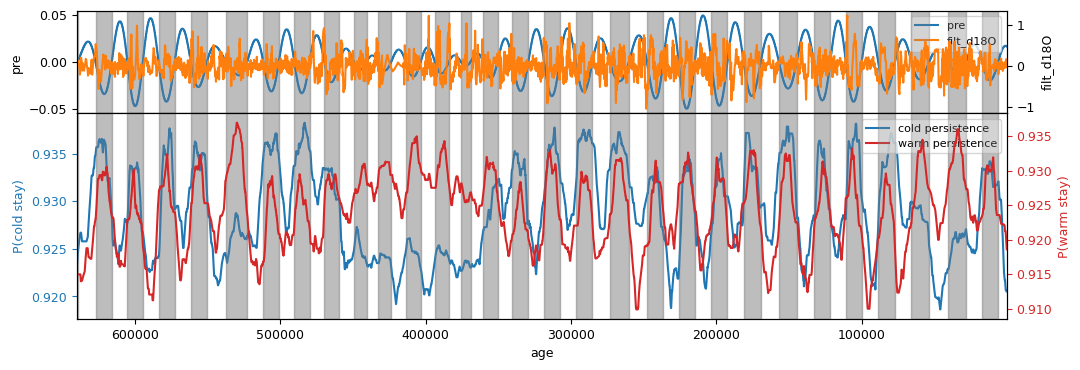

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt=50


# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy()[(df_filt_d18O['age'] > 71000) & (df_filt_d18O['age'] <= 191000)], dt, if_plot=False)

df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), dt, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=1000,sq_method='quantile')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig, te_obl=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=1000)
print(result)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

flip_events =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6)

print(flip_events)


# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



# Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# TE on exccentricity

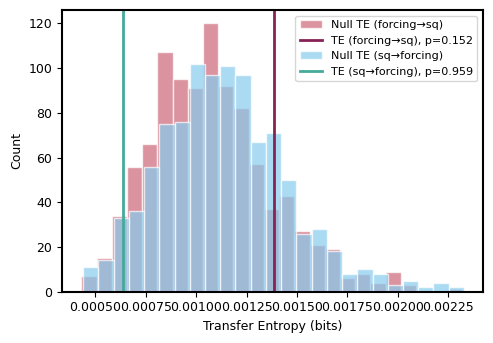

False


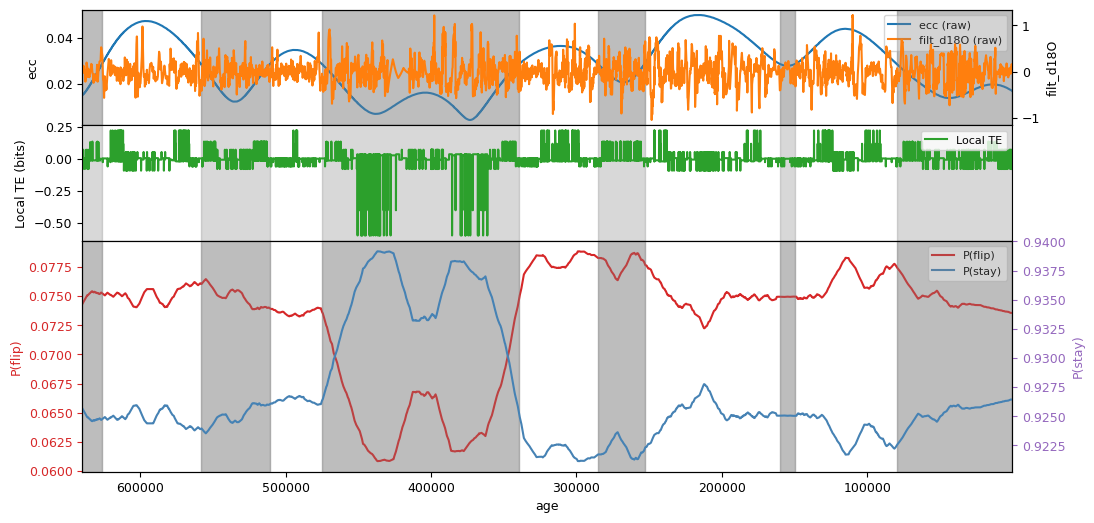

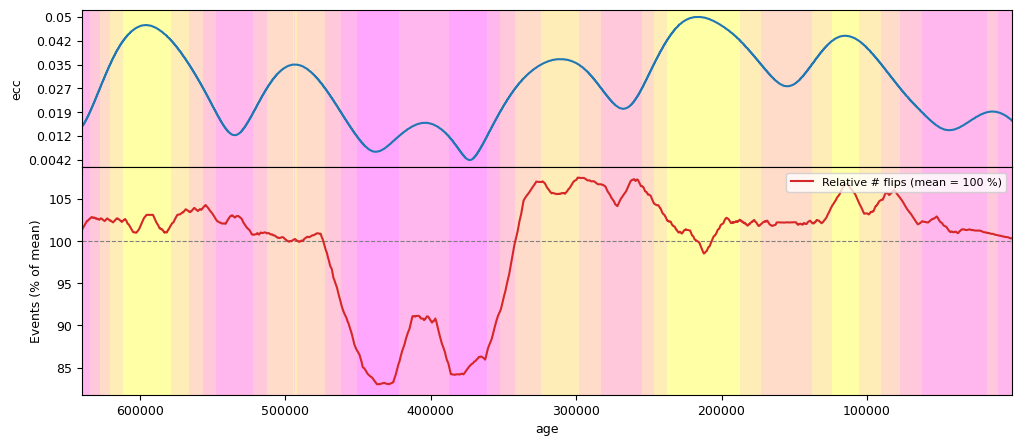

In [25]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

dt = 50
df_sq_i, df_ecc_i = sa.interpolate_data_ecc(df_filt_d18O.copy(), dt, if_plot=False)


ecc = df_ecc_i['ecc'].values      # source (precession)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(ecc,sq, forcing_bins=8, sq_bins=2, n_surr=1000,sq_method='hist')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_ecc_i.copy(), df_sq_i.copy(),
                   forcing_column='ecc',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=1000)

flip_events =sa. flip_events(df_ecc_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='ecc',
        time_column='age',
        nbins_pre=6)

# An alternative null, IAAF

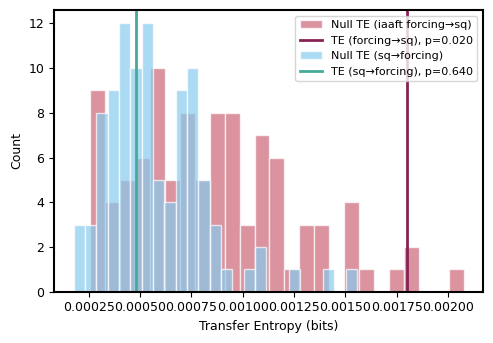

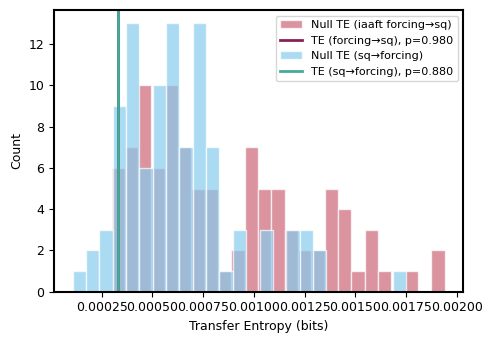

In [26]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt = 50
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), dt, if_plot=False)

pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

# result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(pre,sq, forcing_bins=8, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='phase',k=1)
# result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(obl,sq, forcing_bins=8, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='phase', k=1)

result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='iaaft',k=1)
result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='iaaft', k=1)



# Lag tests

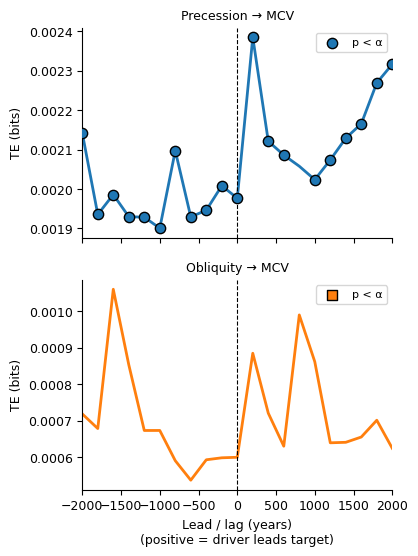

In [27]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_params = dict(forcing_bins=6, sq_bins=2, n_surr=100, sq_method='hist')
results, fig = sa.run_lag_te(
    pre, obl, sq,
    STEP    = 200,
    max_lag = 2000,
    plot    = True,
    **te_params
)


# Different Cutoff freq

In [28]:
df_d18O_P_raw = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\Raw_data\MD01-2444_339-U1385_plank_d18O.csv')

#interpolate the d18O data to dt =50 from age min to max
new_age= np.arange(df_d18O_P_raw['age'].min(), df_d18O_P_raw['age'].max(), 50)
df_d18O_P_raw_interp = pd.DataFrame({'age': new_age})
df_d18O_P_raw_interp['d18O'] = np.interp(new_age, df_d18O_P_raw['age'], df_d18O_P_raw['d18O'])

dt = 50            # kyr per sample (10 yr resolution)
fs = 1 / dt          # sampling frequency (samples per kyr)

for cutoff in range(8000, 12001, 1000):  
    # nyq = fs / 2         # Nyquist frequency
    fc = 1 / cutoff          # cutoff frequency (per kyr)
    Wn = fc / (fs*0.5)        # normalized cutoff

    b, a = butter(N=4, Wn=Wn, btype='highpass')

    # 2) Apply filter to interpolated series
    d18O_filt = filtfilt(b, a, df_d18O_P_raw_interp['d18O'].values)
    df_filt_d18O_temp = pd.DataFrame({'age': df_d18O_P_raw_interp['age'], 'filt_d18O': d18O_filt})


    # print the data length
    print(f"Data length after filtering with cutoff {cutoff} yr: {len(df_filt_d18O_temp)}")
    # DROP NAN
    df_filt_d18O_temp.dropna(inplace=True)
    print(f"Data length after dropping NaN: {len(df_filt_d18O_temp)}")


    df_filt_d18O_temp['filt_d18O'] = df_filt_d18O_temp['filt_d18O'].rolling(window=5, min_periods=1).mean()
    # drop NaN values
    df_filt_d18O_temp = df_filt_d18O_temp.dropna()
    
    # 2. resample + merge forcings (no plot)
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_filt_d18O_temp.copy(),
        dt,
        if_plot=False
    )

    # 3. fetch NumPy arrays
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values

    # 4. TE tests (figures off)
    res_pre, _, te_pre = sa.transfer_entropy_surrogate_test(
        pre, sq,
        forcing_bins=6, sq_bins=2,
        n_surr=1000, sq_method='hist',
        if_plot=False
    )
    res_obl, _, te_obl = sa.transfer_entropy_surrogate_test(
        obl, sq,
        forcing_bins=6, sq_bins=2,
        n_surr=1000,sq_method='hist',
        if_plot=False
    )

    # 5. print summary
    print(
        f"Cutoff = {cutoff/1000:.0f} kyr | "
        f"Precession→MCV sig: {res_pre}, TE = {te_pre:.4f} bits | "
        f"Obliquity→MCV sig: {res_obl}, TE = {te_obl:.4f} bits"
    )



Data length after filtering with cutoff 8000 yr: 12991
Data length after dropping NaN: 12991
Cutoff = 8 kyr | Precession→MCV sig: False, TE = 0.0006 bits | Obliquity→MCV sig: False, TE = 0.0006 bits
Data length after filtering with cutoff 9000 yr: 12991
Data length after dropping NaN: 12991
Cutoff = 9 kyr | Precession→MCV sig: False, TE = 0.0012 bits | Obliquity→MCV sig: False, TE = 0.0006 bits
Data length after filtering with cutoff 10000 yr: 12991
Data length after dropping NaN: 12991
Cutoff = 10 kyr | Precession→MCV sig: True, TE = 0.0014 bits | Obliquity→MCV sig: False, TE = 0.0006 bits
Data length after filtering with cutoff 11000 yr: 12991
Data length after dropping NaN: 12991
Cutoff = 11 kyr | Precession→MCV sig: True, TE = 0.0015 bits | Obliquity→MCV sig: False, TE = 0.0006 bits
Data length after filtering with cutoff 12000 yr: 12991
Data length after dropping NaN: 12991
Cutoff = 12 kyr | Precession→MCV sig: True, TE = 0.0015 bits | Obliquity→MCV sig: False, TE = 0.0006 bits


# Where the TE comes from

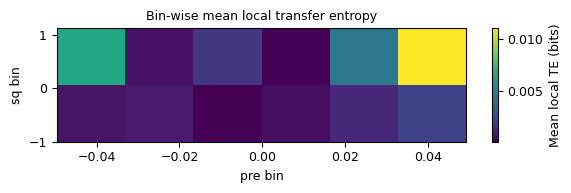

In [29]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

[  2.           2.12812814   2.26446468   2.4095355    2.56390015
   2.72815402   2.90293066   3.08890421   3.28679198   3.49735724
   3.72141217   3.95982098   4.21350322   4.48343737   4.77066461
   5.07629279   5.40150076   5.74754287   6.11575384   6.50755391
   6.92445429   7.368063     7.84009109   8.34235921   8.87680468
   9.4454889   10.05060534  10.694488    11.37962041  12.10864518
  12.88437425  13.70979967  14.58810521  15.52267857  16.5171245
  17.57527869  18.70122254  19.89929892  21.17412896  22.5306298
  23.97403359  25.50990771  27.14417617  28.88314251  30.73351411
  32.70242805  34.79747861  37.02674665  39.39883066  41.92288002
  44.60863025  47.46644056  50.50733383  53.74303909  57.1860368
  60.84960694  64.74788029  68.89589288  73.30964404  78.00615805
  83.00354985  88.3210949   93.97930352 100.        ]
max-power row = 23   →  period ≈ 23.2 ka


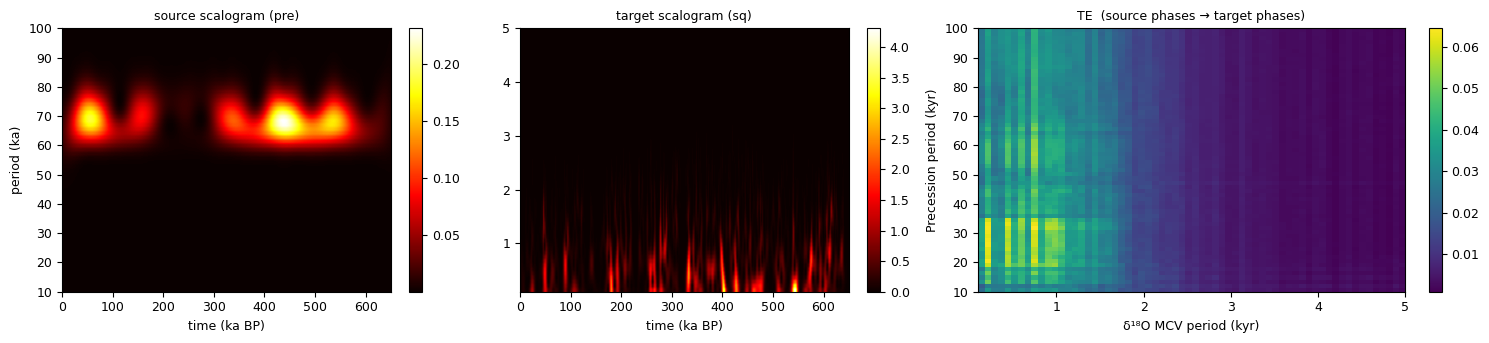

In [30]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = dt,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 10_000,
    src_max_period = 100_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 2*dt,
    trg_max_period = 5_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='δ¹⁸O MCV'        # e.g. 'sq'
)

# P stay P flip analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


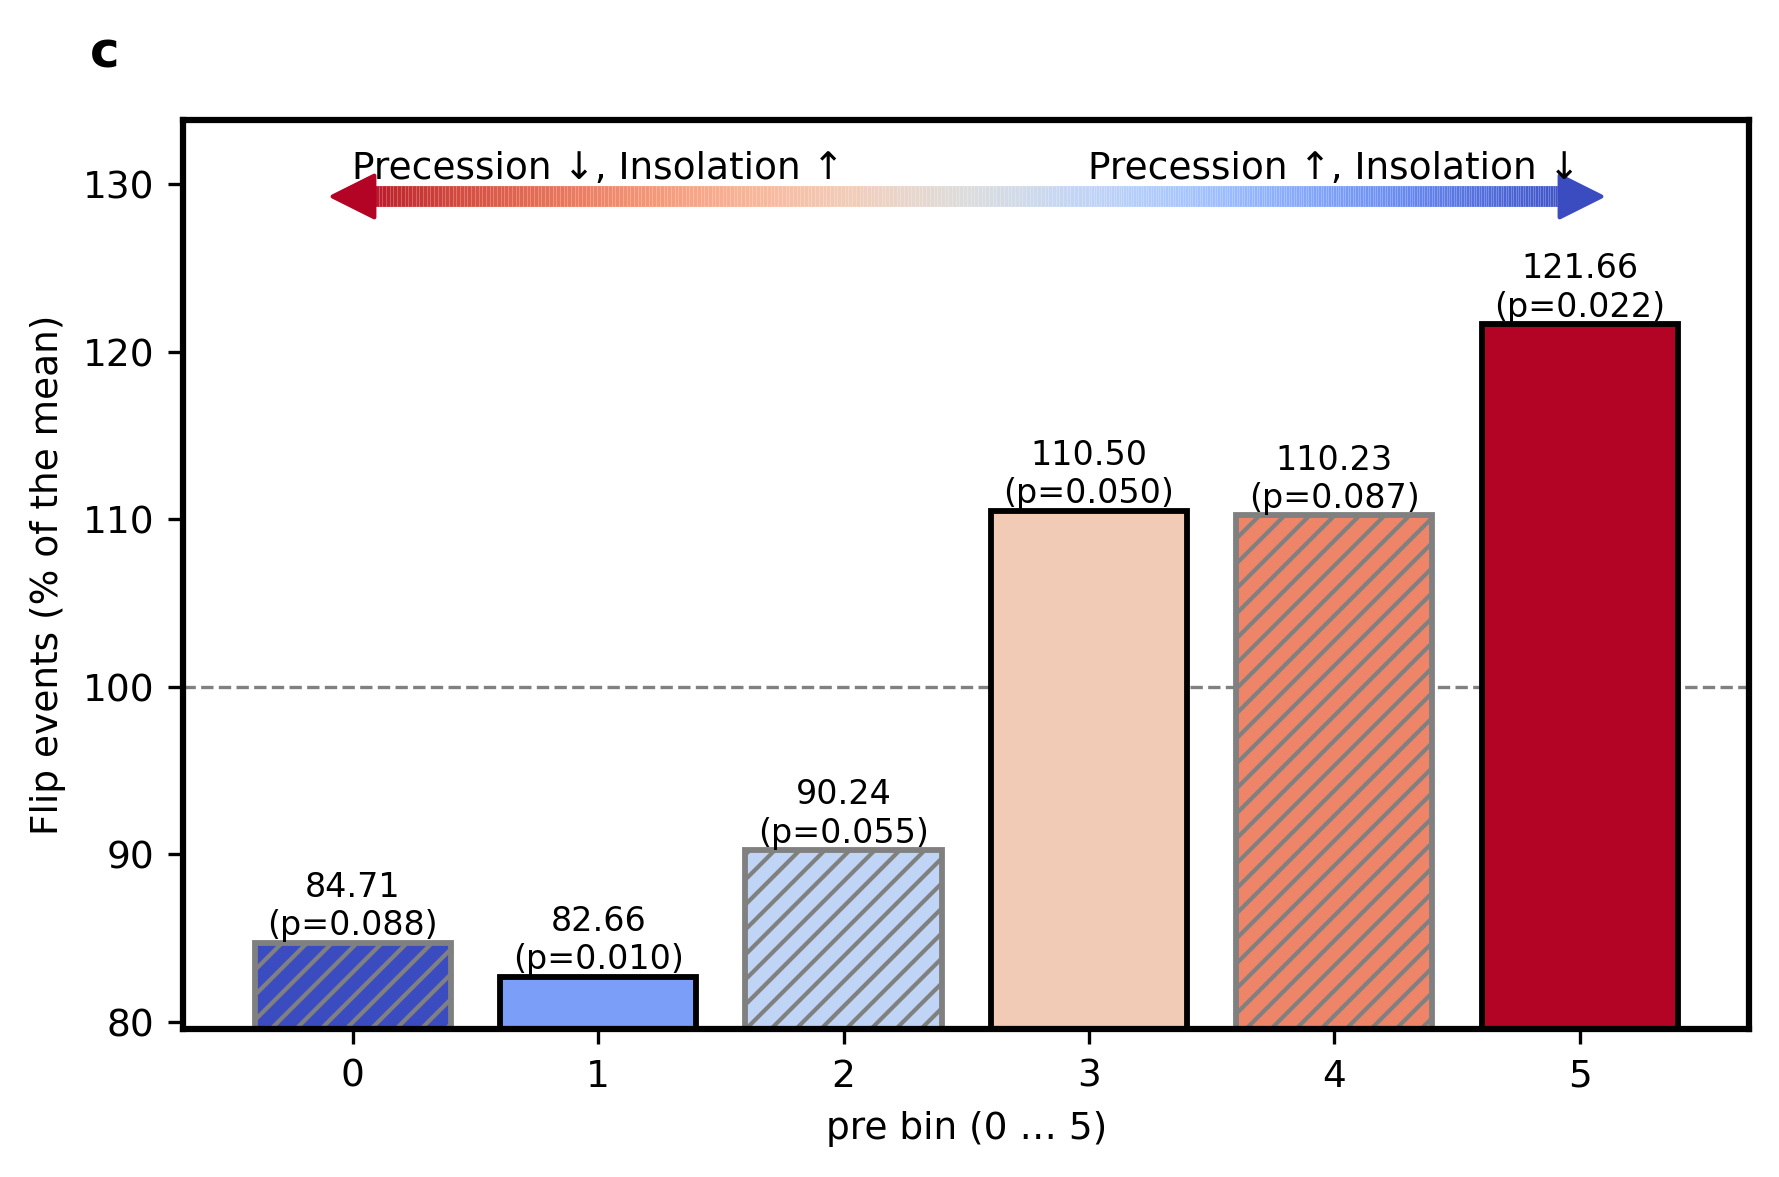

Figure saved as 'Figure_saved/Plank_d18O_prebins_events_surr_relative.pdf'


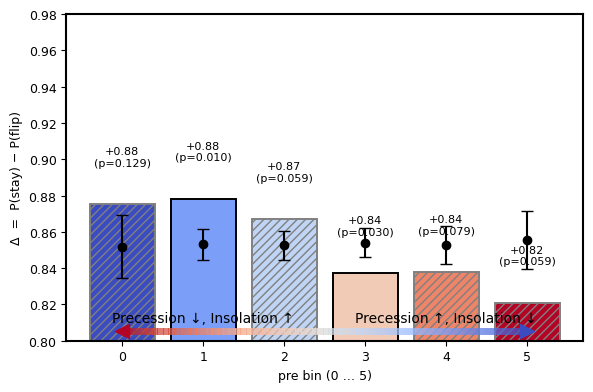

In [12]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_events_surr_relative(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_d18O',
        nbins_pre=6,
        n_surr=1000,
        window =20_000,
        alpha=0.05,
        y_min=None,
        y_max=None,
        random_state=None,   # reproducible
        dpi=300,
        panel_label="c",
        save_figure=True,    # save figure to /Figure_saved
        proxy_name='Plank_d18O'    # merge the proxy name into the file name

)








delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_d18O',
        nbins_pre=6,
        n_surr=100,
        alpha=0.05,
        y_min=0.8,
        y_max=0.98,
        random_state=0   # reproducible
)


# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_d18O',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

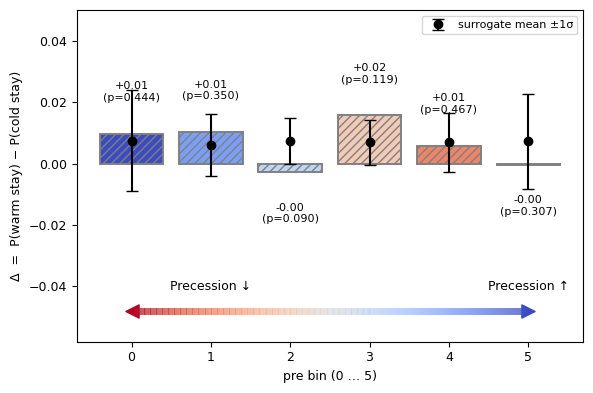

In [40]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
# delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
#     df_pre      = df_obl_i,
#     df_sq       = df_sq_i,
#     forcing_column='obl',
#     target_column='filt_d18O',
#     nbins_pre   = 6,
#     n_surr      = 1000,
#     alpha       = 0.05,
#     random_state=0
# )

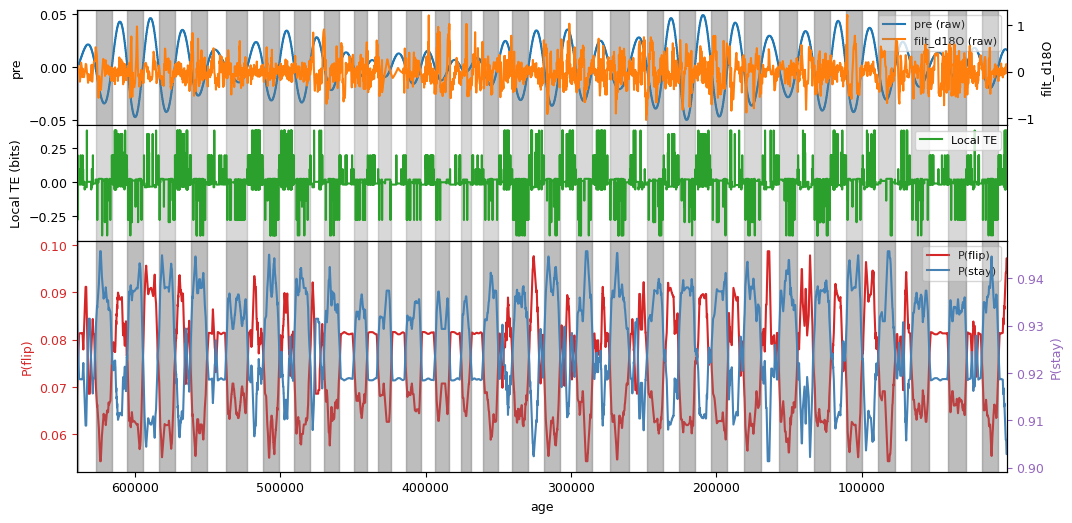

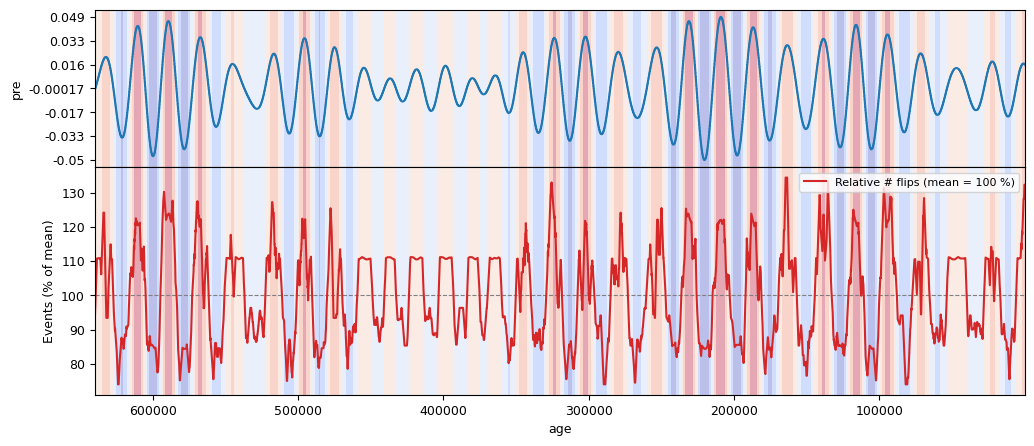

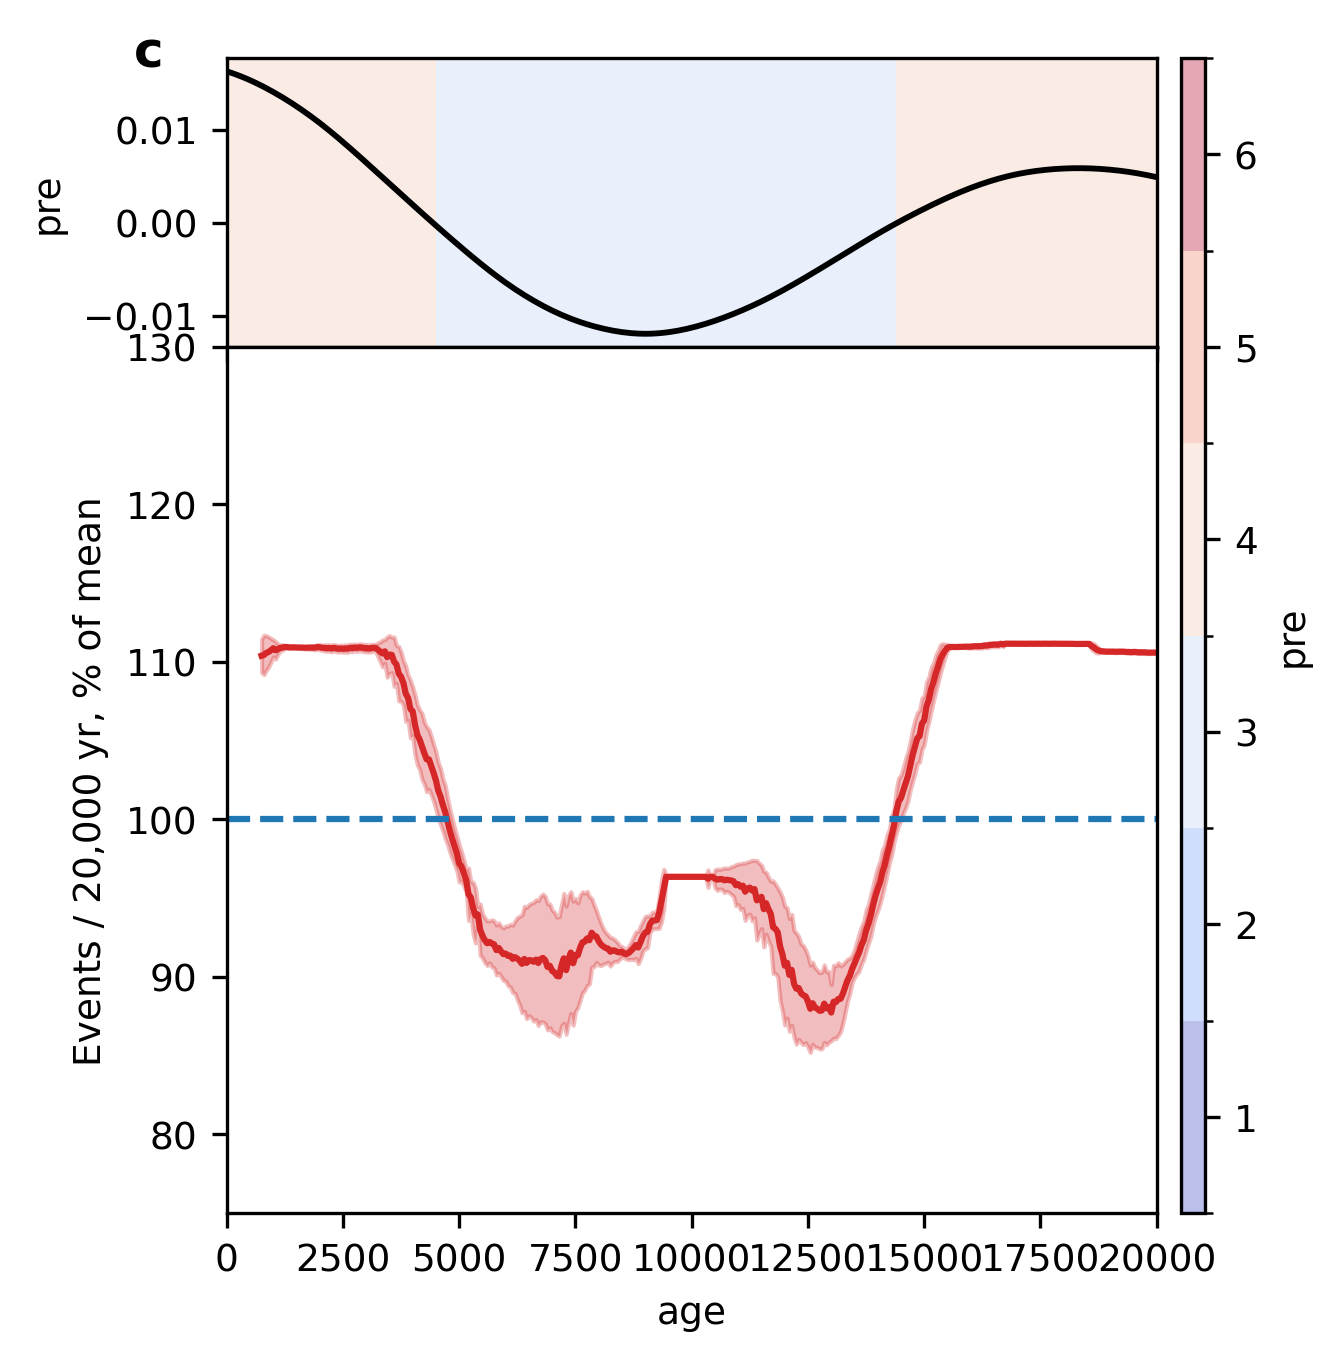

Figure saved as 'Figure_saved/Plank_d18O_ccm_forecast.pdf'


In [31]:
df_pre_future_resampled = pd.read_csv('D:/Vscode/bipolar_seesaw_CCM/inso_data/pre_future_0_20kyr_inter100.csv')



from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)



flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=40)

events_train =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6,
        cmap_name='coolwarm',
        )



events_mean, events_lower, events_upper = sa.predict_events_future_ccm(df_pre_i.copy()[1:], events_train,
                            df_pre_future_resampled,
                            E=6, tau=3, band_sigma=1,  
                            window=20_000,              # yrs; make this whatever you like
                            cmap_name='coolwarm',
                            panel_label="c",
                            dpi=300,
                            xmax=20_000,
                            show_cb=True,
                            show_legend=False,
                            save_fig=True,    # save figure to /Figure_saved
                            proxy_name='Plank_d18O'    # merge the proxy name into the file
                            )



# The following are sensitivity tests

# Bin count

(13998,) (13998,) (13998,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    473   1276   1770   1813   1360    490
sq=1    457   1064   1972   1819    986    518


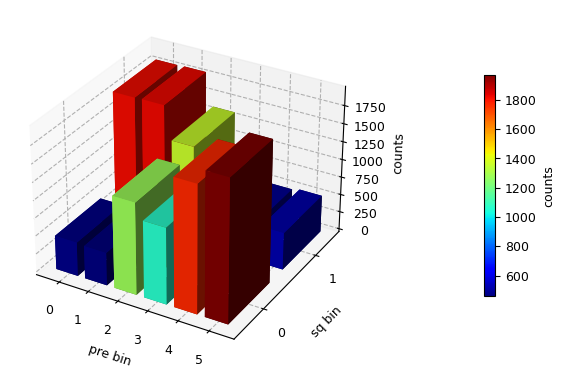

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    602   1468   1354   1223   1433   1102
sq=1    558   1342   1180   1156   1660    920


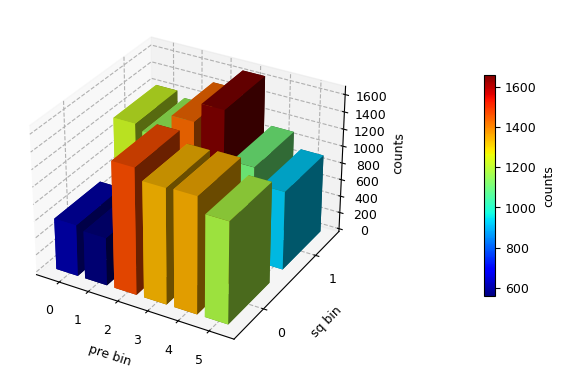

In [15]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

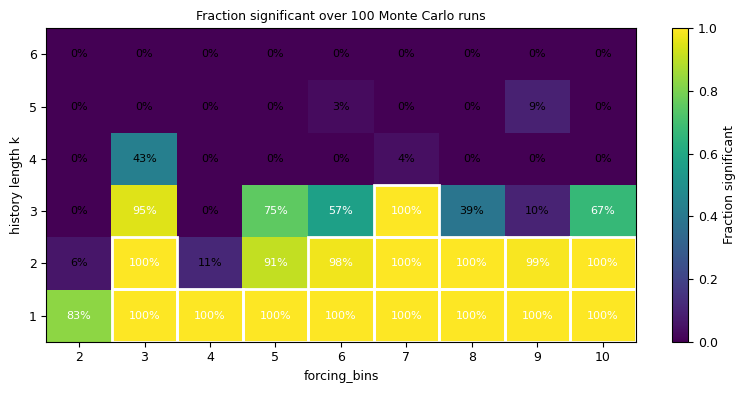

In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 50, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [43]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)


# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 100, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_d18O'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

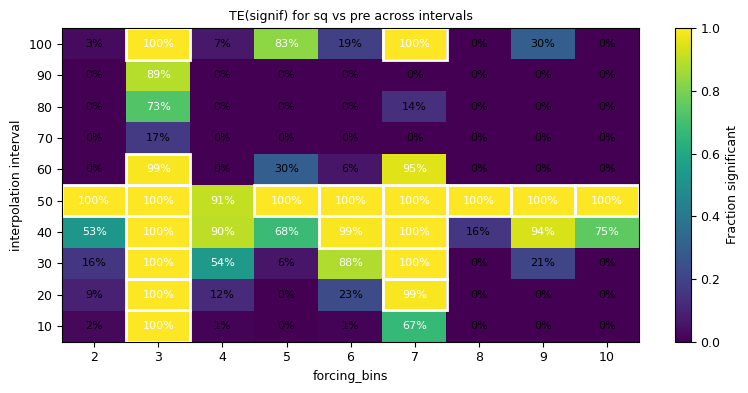

In [44]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O.copy(),
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=4,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

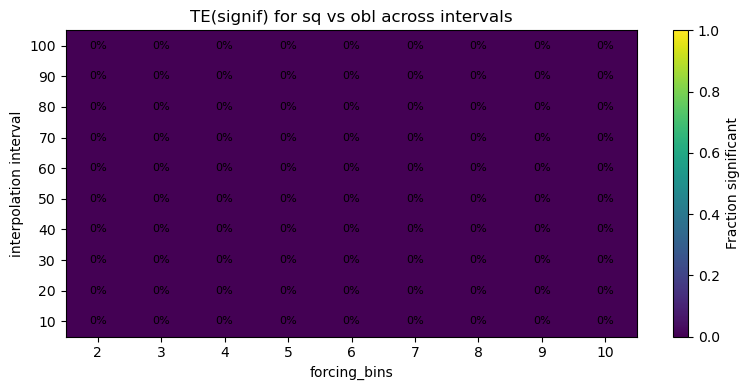

In [ ]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)



# f=sa.mc_TE_heatmap_inter(
#     df_filt_d18O.copy(),
#     target_column='filt_d18O',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [17]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 10000
max_age_ratio = max_age_error / np.max(df_filt_d18O['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_d18O.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 20, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 72 runs
  obl → sq was significant in 100 runs


# Influence of noise: random thining

In [20]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, True), (0.6000000000000001, False), (0.8, True), (1.0, False)]
[(0.2, True), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]


# The influence of different bining plan ([max-min]/2; median; k-means)

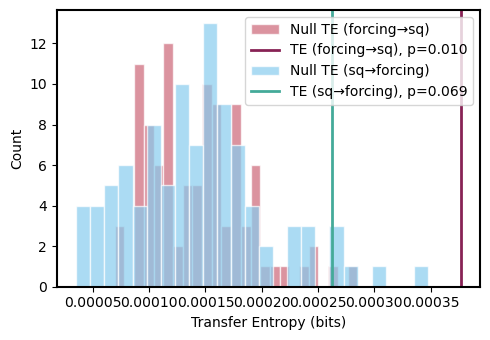

True


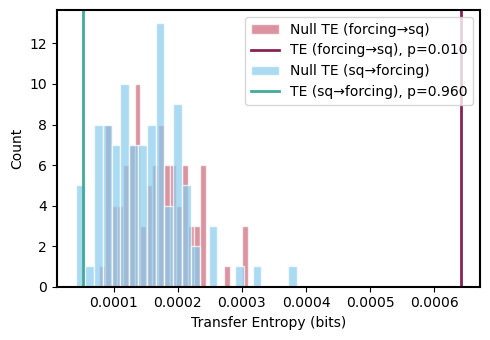

True


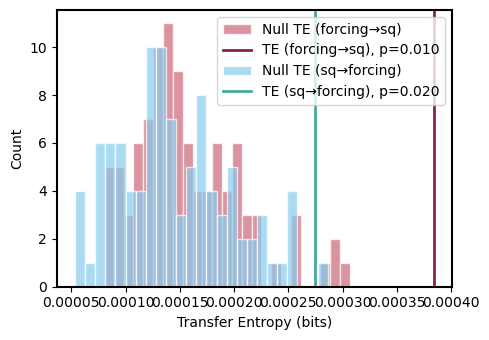

False


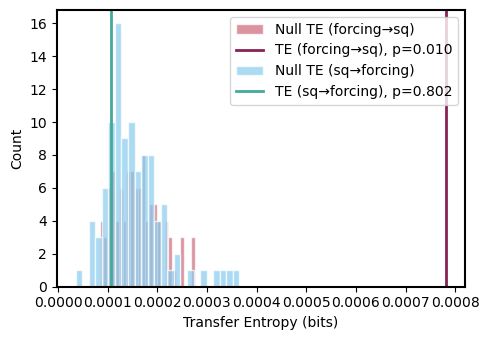

True


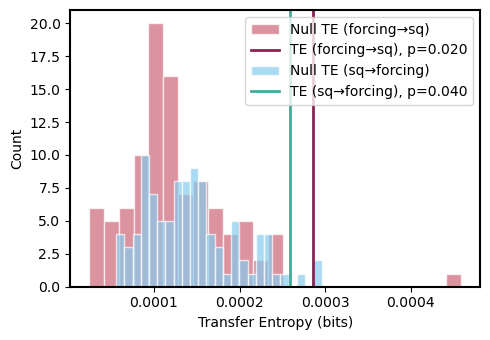

False


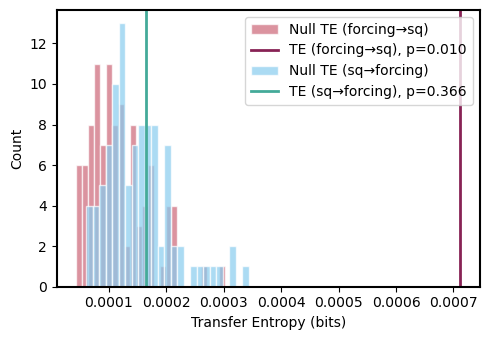

True


In [21]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

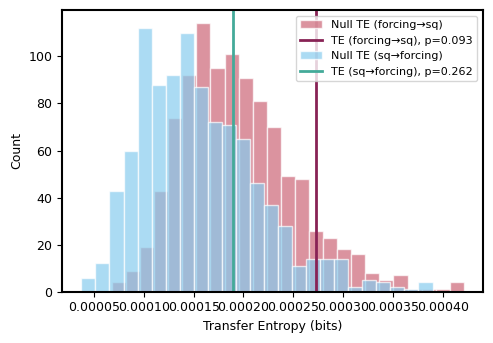

False


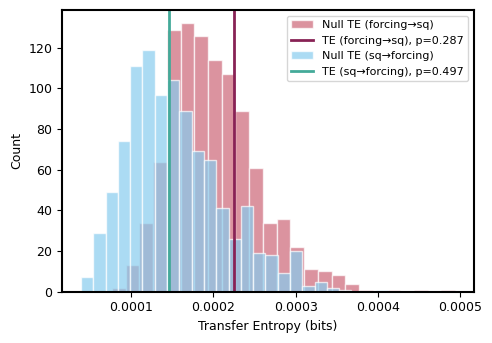

False


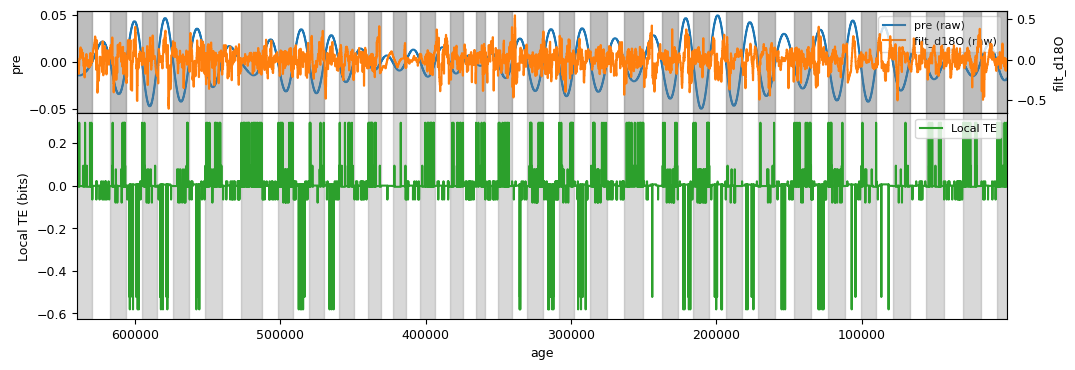

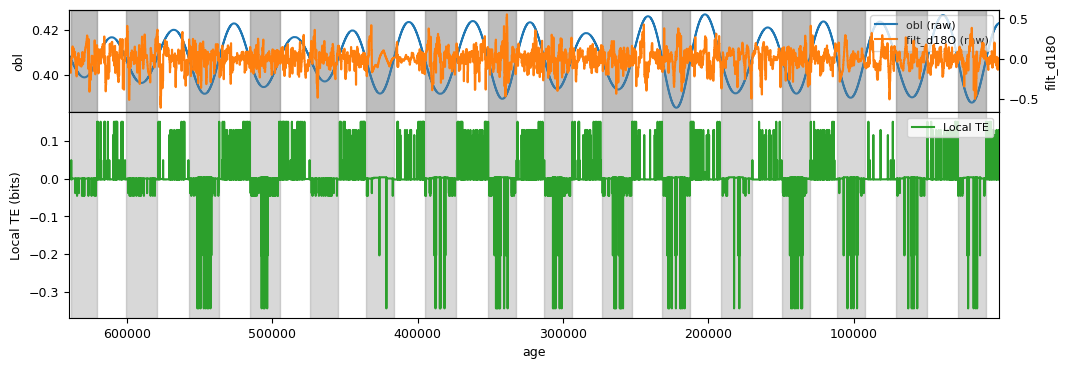

In [9]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=1000)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=1000)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

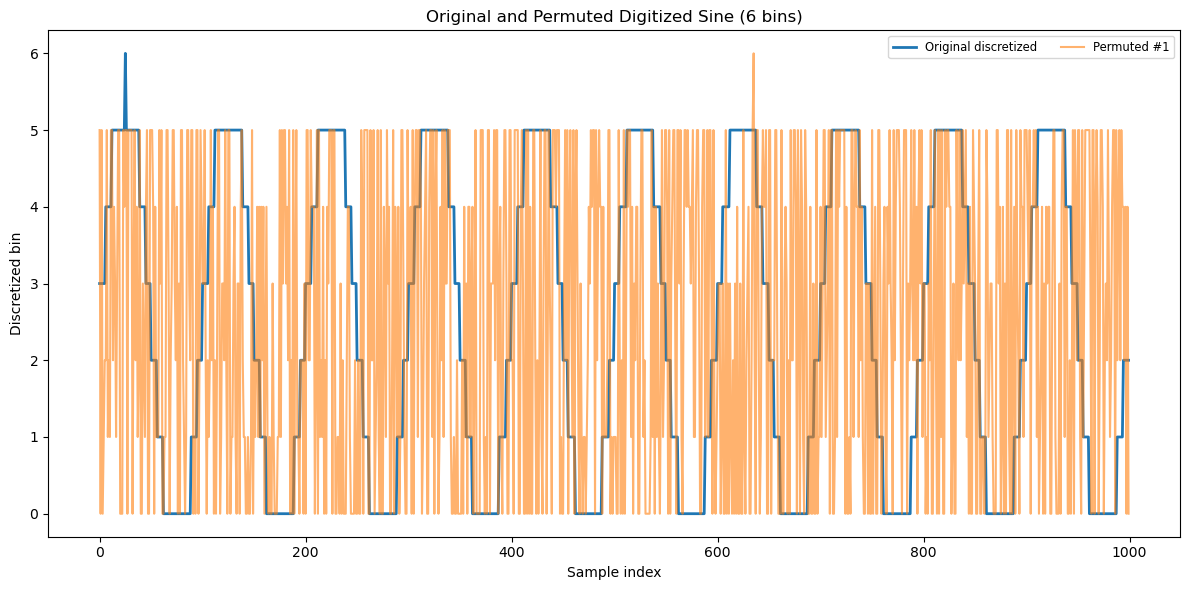

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The d18O bins

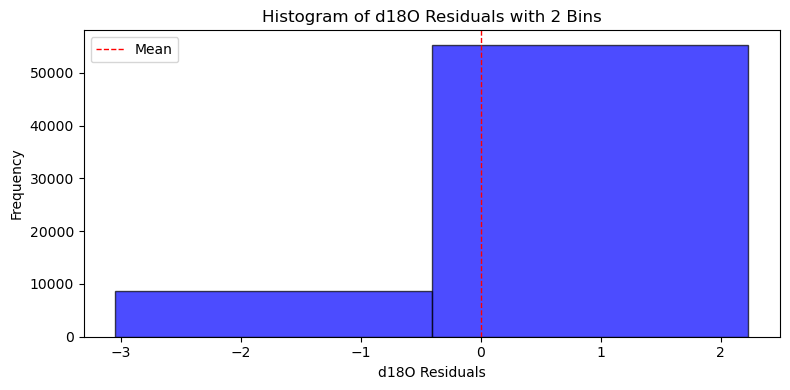

In [23]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of d18O Residuals with 2 Bins')
plt.xlabel('d18O Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()